In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
import seaborn as sns

In [21]:
df = pd.read_csv("data/traficogt_clean.csv")
df.head()

,fecha_gt,hora_gt,anio,mes_num,mes_nombre,dia_semana,hora,id,user.username,rawContent,...,likeCount,quoteCount,date,user.id,mentionedUsers,clean_text,mentions,datetime_utc,datetime_gt,dia
0,2024-09-12,08:22:06,2024,9,Septiembre,Jueves,8,1834236045598056867,traficogt,Es comprensible la resolución... El ruso sabe ...,...,1,0,2024-09-12 14:22:06+00:00,93938886,[],comprensible resolución ruso sabe engrasar maq...,[],2024-09-12 14:22:06+00:00,2024-09-12 08:22:06-06:00,12
1,2024-09-11,18:39:56,2024,9,Septiembre,Miércoles,18,1834029142565658846,monymmorales,La corrupción de la @CC_Guatemala\nes descarad...,...,84,4,2024-09-12 00:39:56+00:00,976875408,"[{'id': 783345301256073216, 'id_str': '7833453...",corrupción descarada falsificación documentos ...,['cc_guatemala'],2024-09-12 00:39:56+00:00,2024-09-11 18:39:56-06:00,11
2,2024-09-11,19:21:04,2024,9,Septiembre,Miércoles,19,1834039491826180424,animaldgalaccia,@PNCdeGuatemala @mingobguate @FJimenezmingob @...,...,1,0,2024-09-12 01:21:04+00:00,1730828822029750272,"[{'id': 130315077, 'id_str': '130315077', 'use...",NaN,"['pncdeguatemala', 'mingobguate', 'fjimenezmin...",2024-09-12 01:21:04+00:00,2024-09-11 19:21:04-06:00,11
3,2024-09-11,14:20:01,2024,9,Septiembre,Miércoles,14,1833963729136091179,estaciondoblea,@amilcarmontejo @AztecaNoticiaGT @BancadaSemil...,...,0,0,2024-09-11 20:20:01+00:00,1802661334355456000,"[{'id': 372126670, 'id_str': '372126670', 'use...",NaN,"['amilcarmontejo', 'aztecanoticiagt', 'bancada...",2024-09-11 20:20:01+00:00,2024-09-11 14:20:01-06:00,11
4,2024-09-10,18:34:31,2024,9,Septiembre,Martes,18,1833665391698092330,cubreserva,@soy_502 @AztecaNoticiaGT @CONAPgt @DenunciaEM...,...,1,0,2024-09-11 00:34:31+00:00,1155617398675988481,"[{'id': 1687984068, 'id_str': '1687984068', 'u...",urgente zona deterioro tala inmoderada tráfico...,"['soy_502', 'aztecanoticiagt', 'conapgt', 'den...",2024-09-11 00:34:31+00:00,2024-09-10 18:34:31-06:00,10


# Resumen Basico

In [22]:
print("Número total de tweets:", len(df))
print("Número de usuarios únicos:", df["user.username"].nunique())
print("Rango de fechas:", df["fecha_gt"].min(), "->", df["fecha_gt"].max())

Número total de tweets: 5596
Número de usuarios únicos: 2071
Rango de fechas: 2022-12-09 -> 2024-09-12


# Distribución temporal

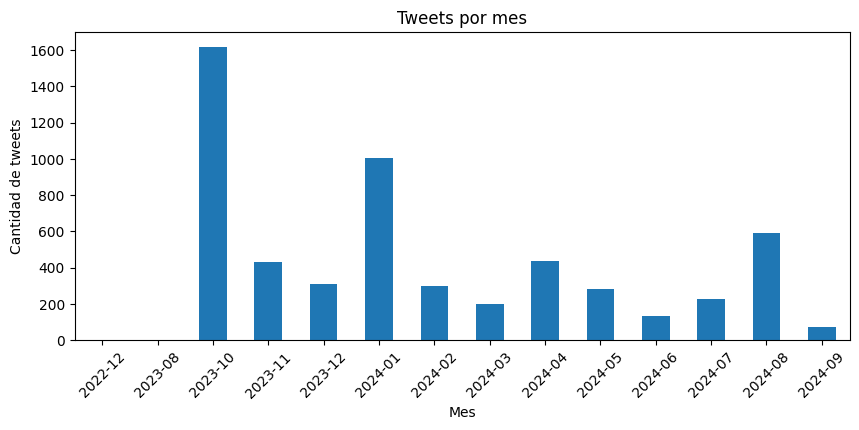

In [23]:
# Agrupar por año y mes
df["mes_anio"] = pd.to_datetime(df["fecha_gt"]).dt.to_period("M").astype(str)

plt.figure(figsize=(10,4))
df["mes_anio"].value_counts().sort_index().plot(kind="bar")
plt.title("Tweets por mes")
plt.xlabel("Mes")
plt.ylabel("Cantidad de tweets")
plt.xticks(rotation=45)
plt.show()

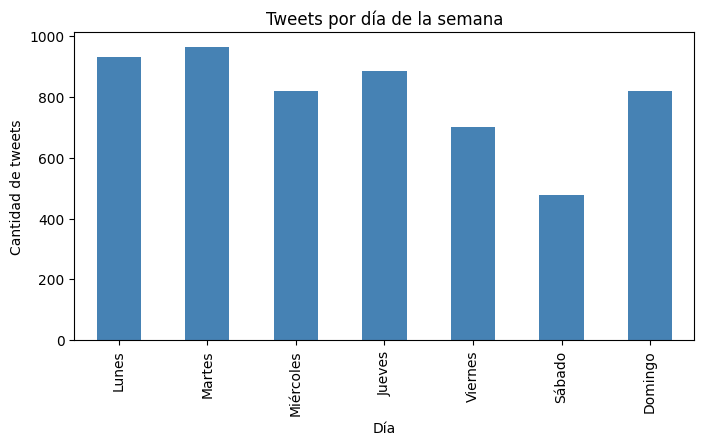

In [24]:
if "dia_semana" not in df.columns:
    df["dia_semana"] = pd.to_datetime(df["fecha_gt"]).dt.day_name(locale="es_ES")

orden_dias = ["Lunes","Martes","Miércoles","Jueves","Viernes","Sábado","Domingo"]

plt.figure(figsize=(8,4))
df["dia_semana"].value_counts().reindex(orden_dias).plot(kind="bar", color="steelblue")
plt.title("Tweets por día de la semana")
plt.xlabel("Día")
plt.ylabel("Cantidad de tweets")
plt.show()


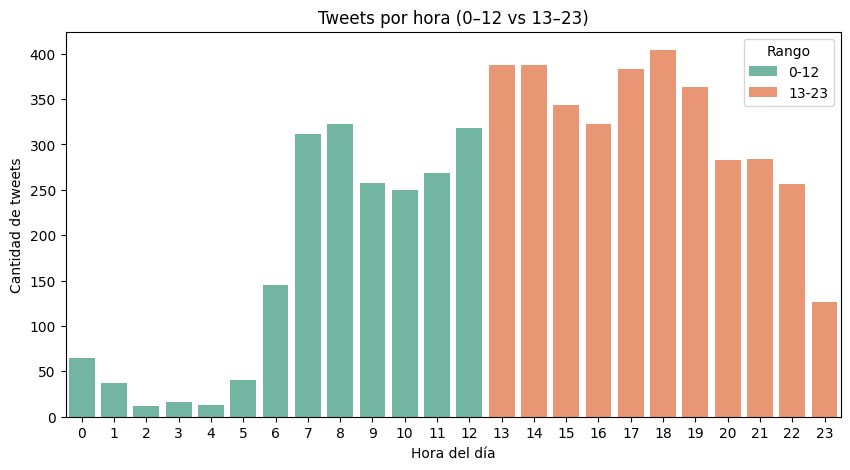

In [25]:
if "hora" not in df.columns:
    df["hora"] = pd.to_datetime(df["hora_gt"], format="%H:%M:%S", errors="coerce").dt.hour

# Clasificar en rangos
df["rango_hora"] = df["hora"].apply(lambda h: "0-12" if h <= 12 else "13-23")

plt.figure(figsize=(10,5))
sns.countplot(data=df, x="hora", hue="rango_hora", palette="Set2")
plt.title("Tweets por hora (0–12 vs 13–23)")
plt.xlabel("Hora del día")
plt.ylabel("Cantidad de tweets")
plt.legend(title="Rango")
plt.show()


# Usuarios más activos

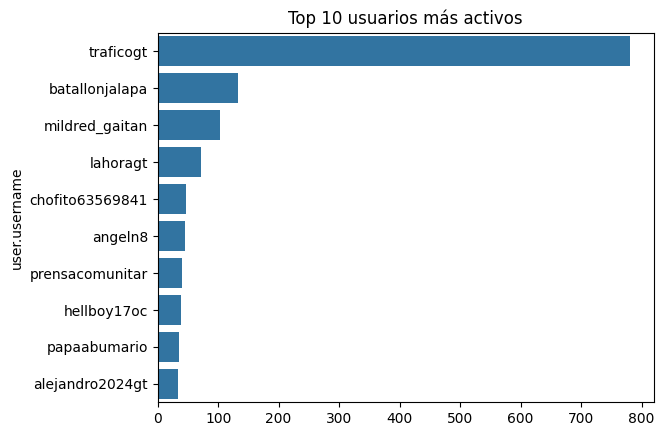

In [26]:
top_users = df["user.username"].value_counts().head(10)
sns.barplot(x=top_users.values, y=top_users.index)
plt.title("Top 10 usuarios más activos")
plt.show()

# Análisis de menciones

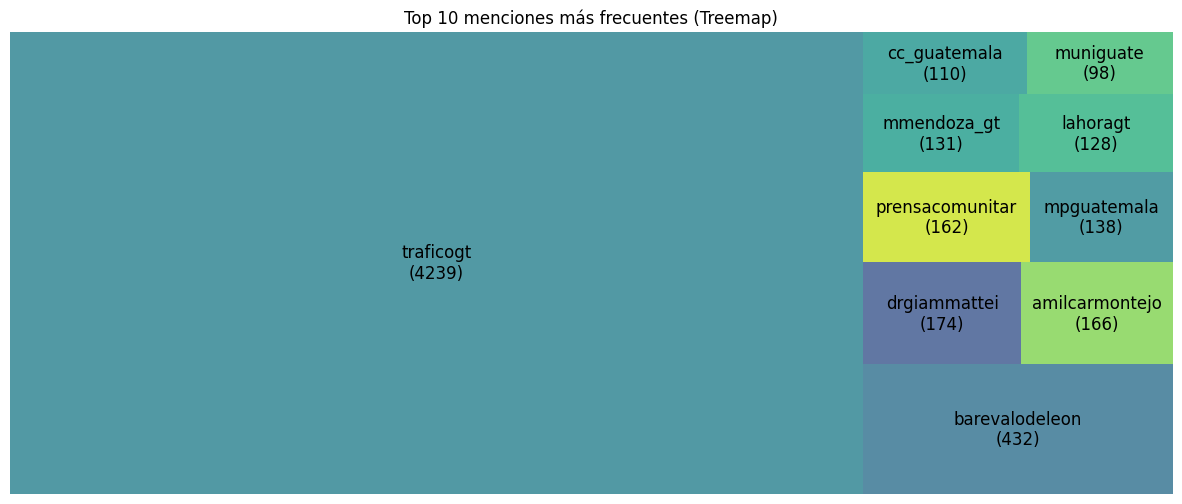

In [32]:
import squarify 

mention_counts = Counter(mentions).most_common(10)
labels, values = zip(*mention_counts)

# Agregar el número a cada etiqueta
labels_with_counts = [f"{lab}\n({val})" for lab, val in zip(labels, values)]

plt.figure(figsize=(15,6))
squarify.plot(sizes=values, label=labels_with_counts, alpha=0.8, text_kwargs={'fontsize':12})
plt.axis("off")
plt.title("Top 10 menciones más frecuentes (Treemap)")
plt.show()

# Retweets y respuestas

Promedio de retweets: 29.48409578270193
Promedio de respuestas: 13.118834882058612


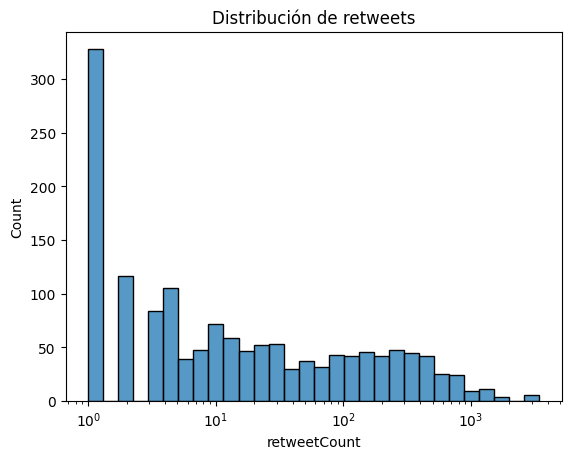

In [34]:
print("Promedio de retweets:", df["retweetCount"].mean())
print("Promedio de respuestas:", df["replyCount"].mean())

sns.histplot(df["retweetCount"], bins=30, log_scale=(True, False))
plt.title("Distribución de retweets")
plt.show()

# Hashtags frecuentes

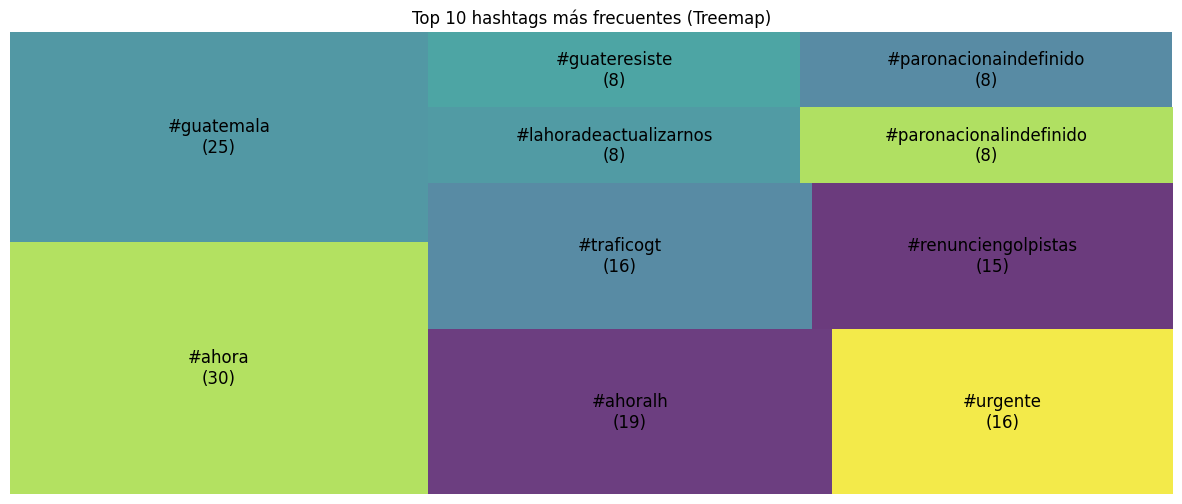

In [35]:
import re

hashtags = []
for text in df["rawContent"].dropna():
    hashtags.extend(re.findall(r"#\w+", text.lower()))

hashtag_counts = Counter(hashtags).most_common(10)
labels, values = zip(*hashtag_counts)

# Etiquetas con hashtag + cantidad
labels_with_counts = [f"{lab}\n({val})" for lab, val in zip(labels, values)]

plt.figure(figsize=(15,6))
squarify.plot(sizes=values, label=labels_with_counts, alpha=0.8, text_kwargs={'fontsize':12})
plt.axis("off")
plt.title("Top 10 hashtags más frecuentes (Treemap)")
plt.show()


# Nube de Palabras

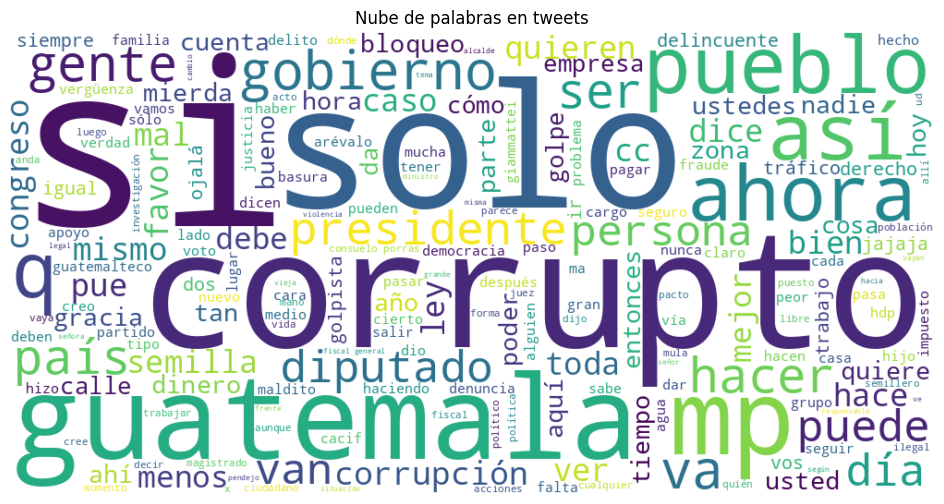

In [30]:
text = " ".join(df["clean_text"].dropna().astype(str))
wordcloud = WordCloud(width=1000, height=500, background_color="white").generate(text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Nube de palabras en tweets")
plt.show()

# Preguntas

## 1. ¿En qué momentos se reporta más tráfico: por mes, por día de la semana o por hora?

Los datos muestran picos de tweets en octubre de 2023 y enero de 2024, lo que coincide con épocas de lluvia y regreso a clases, ademas que en 2023 hubo bloqueos a nivel nacional. A nivel semanal, los reportes son más frecuentes de lunes a jueves, con un descenso importante el sábado. Por hora, los picos aparecen entre 6–9 am y 5–7 pm, correspondientes a las horas pico de movilidad urbana. Esto sugiere que los reportes reflejan fielmente los patrones de congestión en horarios laborales y de lluvia.

## 2. ¿Qué cuentas concentran más interacción y qué rol cumplen en la conversación?

La cuenta @traficogt lidera tanto en actividad como en menciones, lo que la convierte en el nodo central de la red de información vial. También destacan usuarios como @barevalodeleon y medios como @prensacomunitar, que reciben numerosas menciones y contribuyen a difundir o centralizar reportes ciudadanos. Esto indica que la conversación no está dispersa, sino que gira en torno a actores clave que funcionan como hubs de información.

## 3. ¿Qué hashtags y palabras son más usados y qué revelan sobre la percepción ciudadana?

Los hashtags frecuentes incluyen #guatemala, #ahora, #traficogt, #urgente, que reflejan tanto localización como inmediatez en los reportes. En la nube de palabras predominan términos como “corrupto”, “mp”, “gobierno”, “pueblo”, que apuntan a una fuerte carga política en la conversación, además de los relacionados al tráfico. Esto sugiere que la cuenta de tráfico funciona también como espacio donde los usuarios expresan malestar social más allá de los atascos.